#### Import Tensorflow etc

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


### Loading the data from the directories and preprocess it for training


In [20]:
train_dir = '/Users/olle/Downloads/final_symbols_split_ttv/train'
val_dir = '/Users/olle/Downloads/final_symbols_split_ttv/val'
test_dir = '/Users/olle/Downloads/final_symbols_split_ttv/test'



In [5]:
# Parameters for loading the dataset
batch_size = 32
img_height = 28
img_width = 28

In [33]:
# Load training data
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',  # Automatically infer labels from the subdirectory names
    label_mode='int',   # Label as integers (suitable for categorical cross-entropy)
    color_mode='grayscale',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True #The dataset should be shuffled randomly each time it is iterated over during training
)

class_names = train_dataset.class_names  # Automatically inferred from subdirectory names

Found 42749 files belonging to 14 classes.


In [23]:
# Load validation data
val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    labels='inferred',
    label_mode='int',
    color_mode='grayscale',
    batch_size=batch_size,
    image_size=(img_height, img_width)
)

Found 5337 files belonging to 14 classes.


In [25]:
# Load test data
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    color_mode='grayscale',
    batch_size=batch_size,
    image_size=(img_height, img_width)
)

Found 5356 files belonging to 14 classes.


### Preprocess and Prepare for Training

In [30]:
# To improve training, it's helpful to normalize pixel values and cache the data for performance.

# Normalize the pixel values to [0, 1] from [0, 255]
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Applies normalization_layer to all batches of data
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

# The combination of cache() and prefetch() optimizes the data pipeline, improving training and inference speed by minimizing the
# time spent waiting for data.

# cache(): Stores the dataset in memory after the first epoch
# prefetch(): Preloads batches of data into memory while the model is training on the current batch.
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

### Visualize some data to see that everything works as expected

The following code takes one batch of images and labels from train_dataset.
It loops over the first 9 images in that batch and displays them in a 3x3 grid.
The images are displayed with their corresponding class names as titles, and the axes are hidden for better readability.

2024-11-06 15:39:31.758256: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


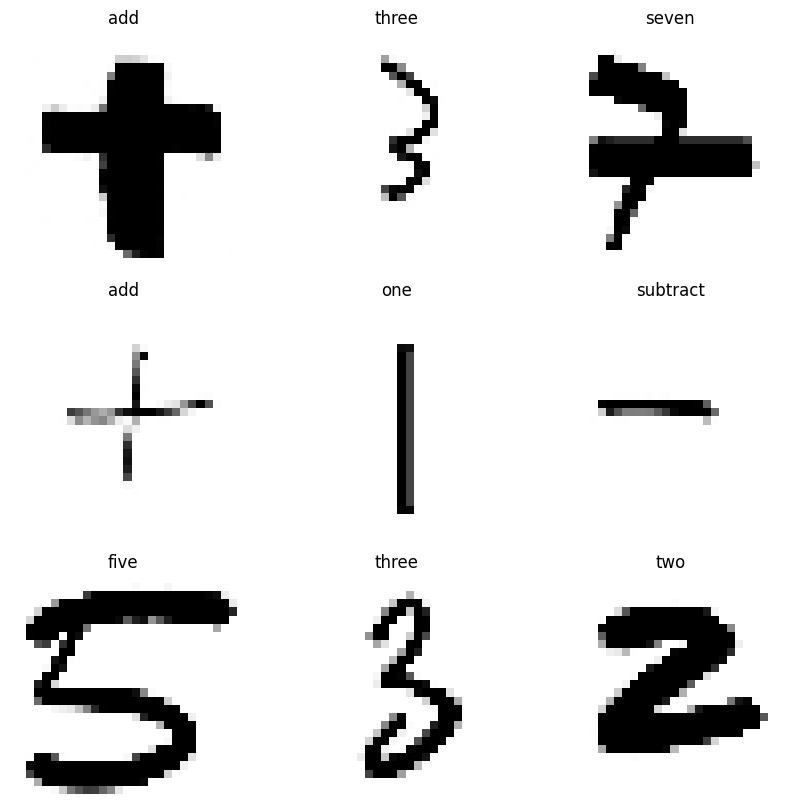

In [34]:


plt.figure(figsize=(10, 10)) # Creating a figure
for images, labels in train_dataset.take(1): # takes one batch of data from the train_dataset
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1) # Creates a subplot in a 3x3 grid and places the next image in the i+1 position.
        plt.imshow(images[i].numpy().squeeze(), cmap='gray')
        # .numpy(): Converts the TensorFlow tensor to a NumPy array for compatibility with Matplotlib
        # .squeeze(): Removes single-dimensional entries ( if the image is shaped (height, width, 1), it becomes (height, width) )
        # cmap='gray': Displays the image in grayscale mode
        plt.title(class_names[labels[i]]) # Sets the title of each subplot to the class name corresponding to the label of the i-th image.
        plt.axis('off') # Hides the axis for a cleaner visualization.
plt.show() #  Renders and displays the plotted figure

# To be clear, the grid with the images is just for me as a devveloper to view. To make sure everything looks and works as expected